In [15]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df= pd.read_csv('Desktop/cybersecurity_intrusion_data.csv') #Importing Datasets

df= df.drop(columns=["session_id"]) #dropping session_id column form the datasets as it contributes nothing

categorical_cols= ['protocol_type', 'encryption_used' , 'browser_type'] #categorical columns which represent categories and not numbers
le= LabelEncoder()
for col in categorical_cols:
    df[col]= le.fit_transform(df[col])



In [17]:
#Spliting datasets
X= df.drop(columns=['attack_detected'])
y= df['attack_detected']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 42)

In [18]:
#Scaling
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [19]:
#Classifier
classifier= RandomForestClassifier(n_estimators=100,random_state= 42)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

Accuracy: 89.675052%


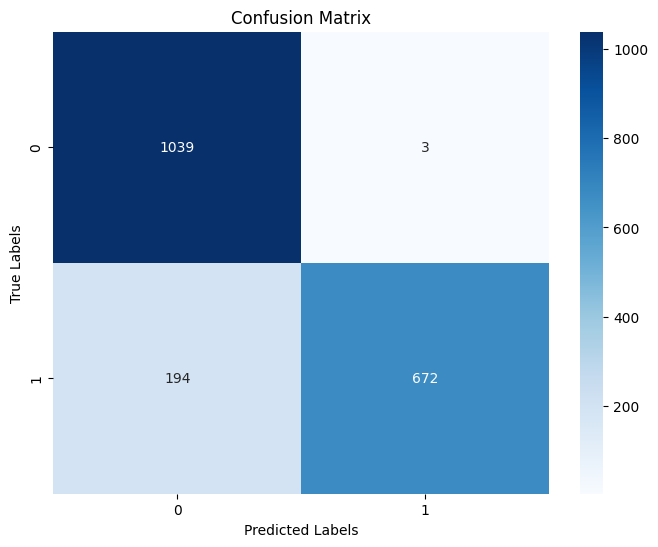

In [20]:
#Accuracy and Confusion Matrix
accuracy= accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy * 100:2f}%')
conf_matrix= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
class_names = sorted(df['attack_detected'].unique())
sns.heatmap(conf_matrix,annot=True,fmt='g',cmap='Blues',cbar= True,xticklabels= class_names ,yticklabels= class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

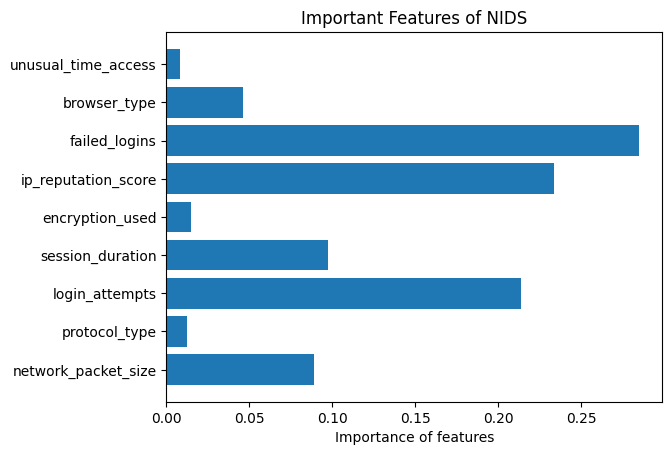

In [21]:
#important features
feature_important= classifier.feature_importances_
plt.barh(X.columns, feature_important)
plt.title("Important Features of NIDS")
plt.xlabel("Importance of features")
plt.show()